In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

%matplotlib inline

k_b = 1.380649 * 10**(-23) #(J/K)
epsilon = 120 * k_b  #(joule)
sigma = 0.34 * 10**(-9) #(m)
m = 6.634 * 10**(-26) #(kg)

# <span style="color:blue">  Exercise 4.1</span>

In [3]:
e_kin  = np.loadtxt( "Equilibration/output_ekin.dat" , dtype = float , delimiter = "," , usecols=(0) , unpack='true')
e_pot  = np.loadtxt( "Equilibration/output_epot.dat" , dtype = float , delimiter = "," , usecols=(0) , unpack='true')
e_tot  = np.loadtxt( "Equilibration/output_etot.dat" , dtype = float , delimiter = "," , usecols=(0) , unpack='true')
temp  = np.loadtxt( "Equilibration/output_temp.dat" , dtype = float , delimiter = "," , usecols=(0) , unpack='true')

#SI UNITS
e_kin *= epsilon 
e_pot *= epsilon
e_tot *= epsilon
temp *= 120

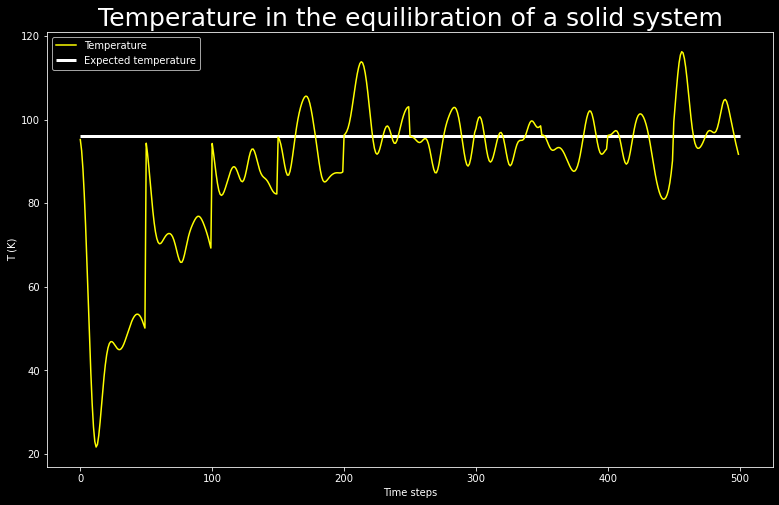

In [23]:
fig, ax = plt.subplots(1,1 , figsize=(13,8))
plt.style.use('dark_background')
ax.plot(np.arange(len(temp)) , temp , color="yellow" , linewidth=1.5 , label = "Temperature")
ax.hlines(0.8*120 , 0 , 500 , color = "white" , linewidth = 3 , label ="Expected temperature")
ax.set_title("Temperature in the equilibration of a solid system" , fontsize=25)
ax.set_xlabel('Time steps')
ax.set_ylabel('T (K)')

#ax.grid(True)
ax.legend(loc="best")

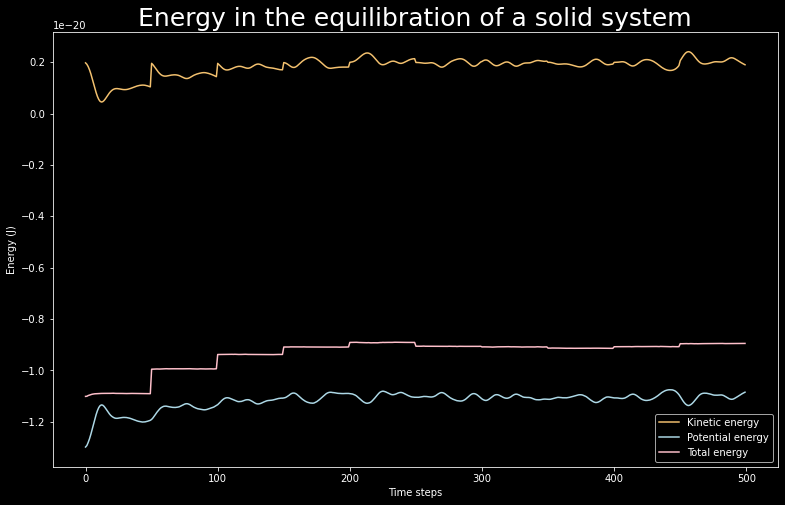

In [22]:
fig, ax = plt.subplots(1,1 , figsize=(13,8))
ax.plot(np.arange(len(e_kin)) , e_kin , color = "#F3C16F", linewidth=1.5, label = "Kinetic energy")
ax.plot(np.arange(len(e_kin)) , e_pot , color = "lightblue" , linewidth=1.5 , label = "Potential energy")
ax.plot(np.arange(len(e_kin)) , e_tot , color = "pink" , linewidth=1.5 , label = "Total energy")

ax.set_title("Energy in the equilibration of a solid system" , fontsize=25)
ax.set_xlabel('Time steps')
ax.set_ylabel('Energy (J)')

#ax.grid(True)
ax.legend(loc="best")

These plots shows the equilibration of a solid model of Argon of 108 particles. 
    
The data come from 10 different simulations of the system, each run after 500 time steps and starting from the last printed configuration of the execution before. The measured steps of Verlet's algorithm were kept only 1 every 10 to avoid an eccessive correlation.
    
It is clear that the NVE Verlet algorithm is not accurate on the temperature used if it is not equilibrated. We see that in the first equilibration "groups" (500 printed steps) the temperature and the energy reach a stabilization, but to a value that is not what one would expect. That is why more runs of the algorithm are necessary to equilibrate the system before the actual measure.
    
As the number of restarts grows, the system reaches a global stabilization and that is when a measure is possible. After that point (4 or 5 runs) the energy remains almost constant and the temperature fluctuates around the expected value.

# <span style="color:blue">  Exercise 4.3</span>

## SOLID ARGON

In [33]:
eksolid , errorksol = np.loadtxt( "solid/ave_ekin.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
epotsol , errorpsol = np.loadtxt( "solid/ave_epot.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
etotsol , errortsol = np.loadtxt( "solid/ave_etot.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
tempsol , errortempsol = np.loadtxt( "solid/ave_temp.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
pressol , errorpressol = np.loadtxt( "solid/ave_pres.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')

#SI UNITS
eksolid *= epsilon 
epotsol *= epsilon
etotsol *= epsilon
tempsol *= 120 
errorksol *= epsilon
errorpsol *= epsilon
errortsol *= epsilon
errortempsol *= 120
pressol *= epsilon/sigma**3
errorpressol *= epsilon/sigma**3

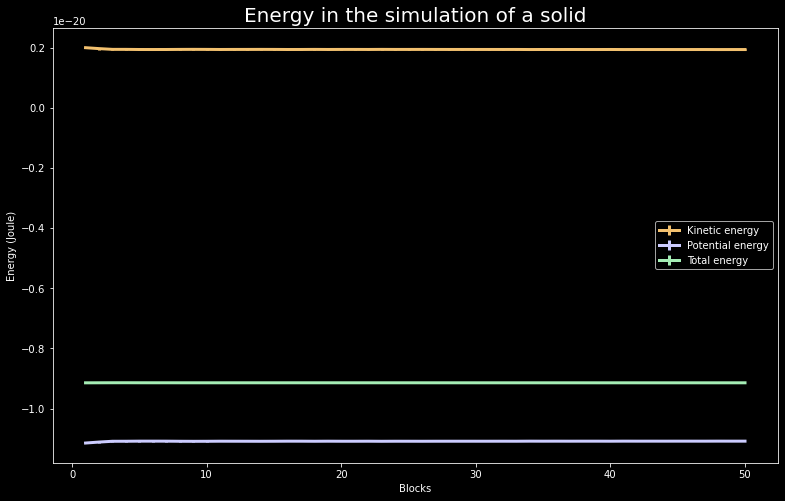

In [35]:
axis = np.arange(len(eksolid))+1
fig, ax = plt.subplots(1,1 , figsize=(13,8))
ax.errorbar(axis , eksolid , yerr=errorksol , color = "#F3C16F", linewidth=3, label = "Kinetic energy")
ax.errorbar(axis , epotsol , yerr=errorpsol , color = "#CCCCFF" , linewidth=3 , label = "Potential energy")
ax.errorbar(axis , etotsol , yerr=errortsol , color = "#A5EDB5" , linewidth=3 , label = "Total energy")
ax.set_title("Energy in the simulation of a solid" , fontsize=20)
ax.set_xlabel('Blocks')
ax.set_ylabel('Energy (Joule)')
#ax.grid(True)
ax.legend(loc="best")

Text(0, 0.5, 'Pressure (Pascal)')

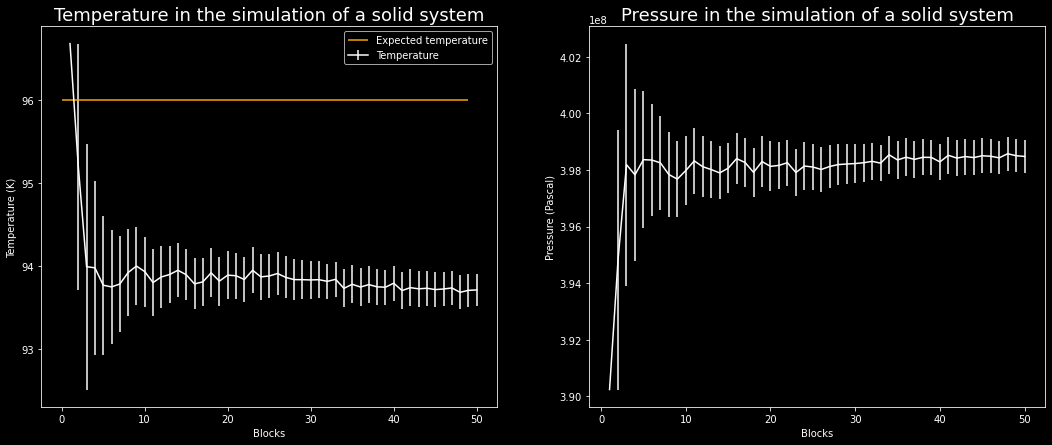

In [41]:
fig, [ax1 , ax2] = plt.subplots(1,2 , figsize=(18,7))
axis = np.arange(len(tempsol))+1
axis_1 = np.arange(len(pressol))+1
#Temperature
ax1.errorbar( axis , tempsol , yerr=errortempsol , color="white" , linewidth=1.5 , label = "Temperature")
ax1.hlines(0.8*120 , 0 , 49 , color = "orange" , linewidth = 1.5 , label ="Expected temperature")
ax1.set_title("Temperature in the simulation of a solid system" , fontsize=18)
ax1.set_xlabel('Blocks')
ax1.set_ylabel('Temperature (K)')
#ax1.grid(True)
ax1.legend(loc="best")

#pressure
ax2.errorbar( axis_1, pressol , yerr=errorpressol , color="white" , linewidth=1.5 , label = "Pressure")
ax2.set_title("Pressure in the simulation of a solid system" , fontsize=18)
ax2.set_xlabel('Blocks')
ax2.set_ylabel('Pressure (Pascal)')
#ax2.grid(True)

## LIQUID ARGON

In [42]:
ekliq , errorkliq = np.loadtxt( "liquid/ave_ekin.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
epotliq , errorpliq = np.loadtxt( "liquid/ave_epot.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
etotliq , errortliq = np.loadtxt( "liquid/ave_etot.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
templiq , errortempliq = np.loadtxt( "liquid/ave_temp.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
presliq , errorpresliq = np.loadtxt( "liquid/ave_pres.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')

#SI UNITS
ekliq *= epsilon 
epotliq *= epsilon
etotliq *= epsilon
templiq *= 120 
errorkliq *= epsilon
errorpliq *= epsilon
errortliq *= epsilon
errortempliq *= 120
presliq *= epsilon/sigma**3
errorpresliq *= epsilon/sigma**3

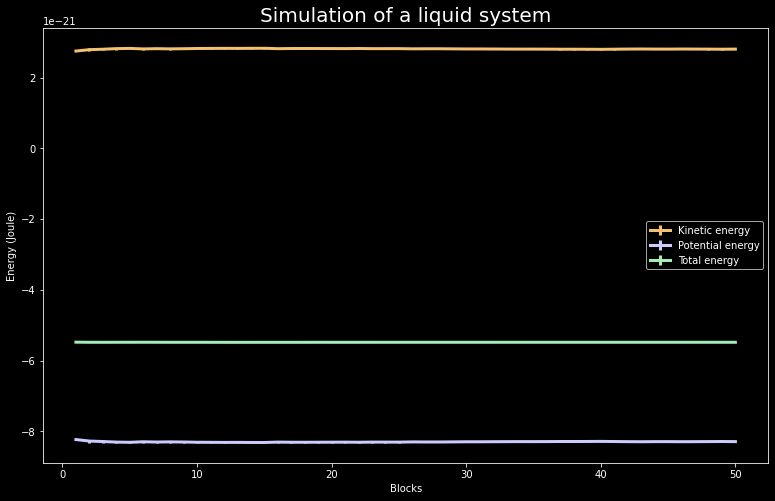

In [44]:
fig, ax1  = plt.subplots( 1 , 1 , figsize=(13,8))
ax_x = np.arange(len(ekliq))+1
#energies
ax1.errorbar(ax_x , ekliq , yerr=errorkliq , color = "#F3C16F", linewidth=3, label = "Kinetic energy")
ax1.errorbar(ax_x , epotliq , yerr=errorpliq , color = "#CCCCFF" , linewidth=3 , label = "Potential energy")
ax1.errorbar(ax_x , etotliq , yerr=errortliq , color = "#A5EDB5" , linewidth=3 , label = "Total energy")
ax1.set_title("Simulation of a liquid system" , fontsize=20)
ax1.set_xlabel('Blocks')
ax1.set_ylabel('Energy (Joule)')
#ax1.grid(True)
ax1.legend(loc="best")

Text(0, 0.5, 'Pressure (Pascal)')

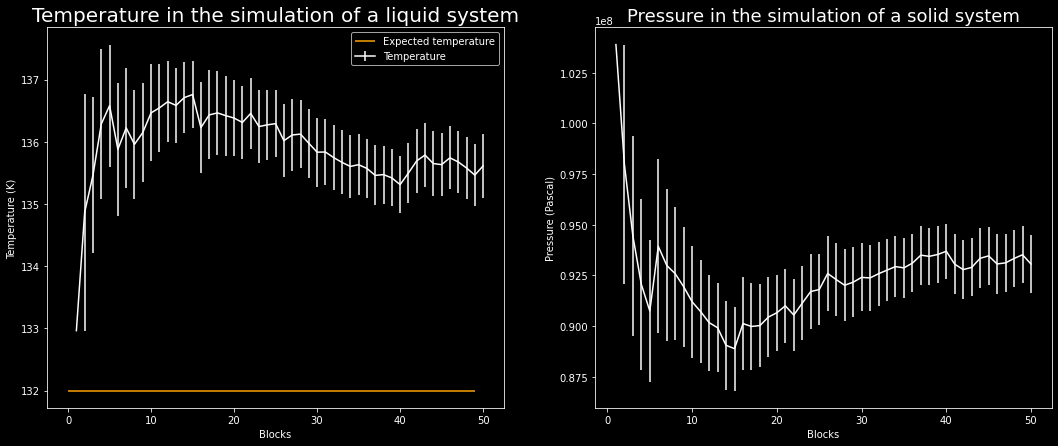

In [47]:
fig, [ax1 , ax2] = plt.subplots(1,2 , figsize=(18,7))
ax_1 = np.arange(len(ekliq))+1
ax_2 = np.arange(len(presliq))+1
#temperature
ax1.errorbar(ax_1 , templiq , yerr=errortempliq , color="white" , linewidth=1.5 , label = "Temperature")
ax1.hlines(1.1*120 , 0 , 49 , color = "orange" , linewidth = 1.5 , label ="Expected temperature")
ax1.set_title("Temperature in the simulation of a liquid system" , fontsize=20)
ax1.set_xlabel('Blocks')
ax1.set_ylabel('Temperature (K)')
#ax1.grid(True)
ax1.legend(loc="best")

#pressure
ax2.errorbar( ax_2, presliq , yerr=errorpresliq , color="white" , linewidth=1.5 , label = "Pressure")
ax2.set_title("Pressure in the simulation of a solid system" , fontsize=18)
ax2.set_xlabel('Blocks')
ax2.set_ylabel('Pressure (Pascal)')
#ax2.grid(True)

## GAS ARGON

In [48]:
ekgas , errorkgas = np.loadtxt( "gas/ave_ekin.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
epotgas , errorpgas = np.loadtxt( "gas/ave_epot.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
etotgas , errortgas = np.loadtxt( "gas/ave_etot.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
tempgas , errortempgas = np.loadtxt( "gas/ave_temp.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
presgas , errorpresgas = np.loadtxt( "gas/ave_pres.dat" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')

#SI UNITS
ekgas *= epsilon 
epotgas *= epsilon
etotgas *= epsilon
tempgas *= 120 
errorkgas *= epsilon
errorpgas *= epsilon
errortgas *= epsilon
errortempgas *= 120
presgas *= epsilon/sigma**3
errorpresgas *= epsilon/sigma**3

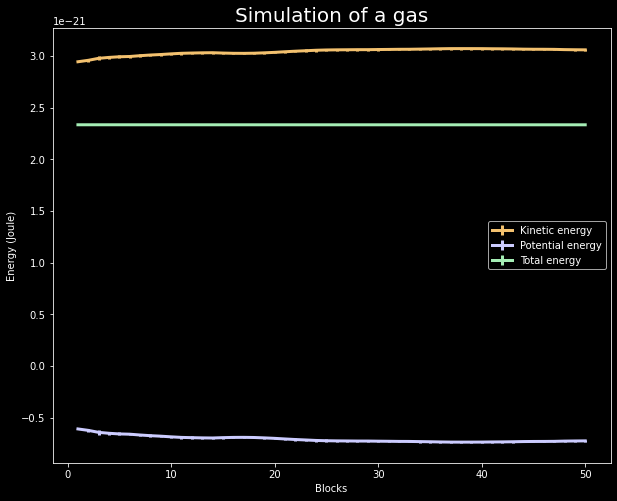

In [50]:
fig, ax = plt.subplots(1,1 , figsize=(10,8))
ax.errorbar(np.arange(len(ekgas))+1 , ekgas , yerr=errorkgas , color = "#F3C16F", linewidth=3, label = "Kinetic energy")
ax.errorbar(np.arange(len(ekgas))+1 , epotgas , yerr=errorpgas , color = "#CCCCFF" , linewidth=3 , label = "Potential energy")
ax.errorbar(np.arange(len(ekgas))+1 , etotgas , yerr=errortgas , color = "#A5EDB5" , linewidth=3 , label = "Total energy")
ax.set_title("Simulation of a gas" , fontsize=20)
ax.set_xlabel('Blocks')
ax.set_ylabel('Energy (Joule)')
#ax.grid(True)
ax.legend(loc="best")

Text(0, 0.5, 'Pressure (Pascal)')

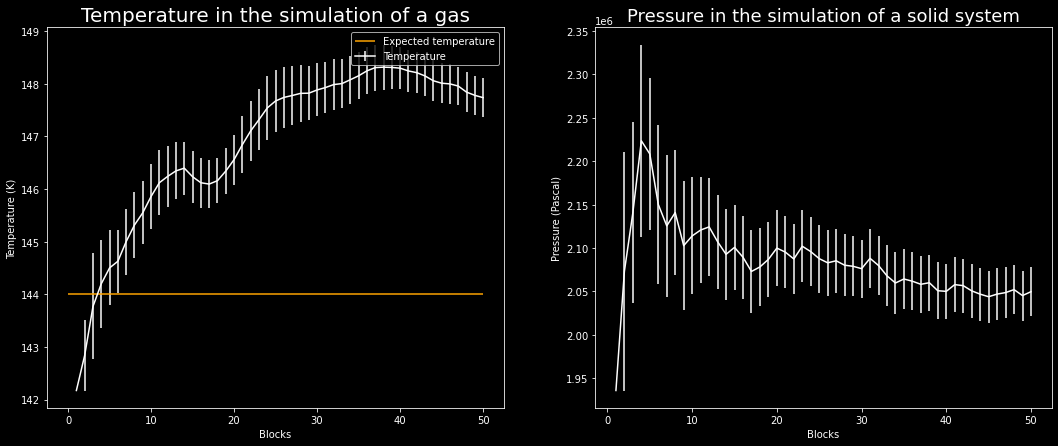

In [52]:
fig, [ax1 , ax2] = plt.subplots(1,2 , figsize=(18,7))
#temperature
ax1.errorbar(np.arange(len(ekgas))+1 , tempgas , yerr=errortempgas , color="white" , linewidth=1.5 , label = "Temperature")
ax1.hlines(1.2*120 , 0 , 50 , color = "orange" , linewidth = 1.5 , label ="Expected temperature")
ax1.set_title("Temperature in the simulation of a gas" , fontsize=20)
ax1.set_xlabel('Blocks')
ax1.set_ylabel('Temperature (K)')
#ax1.grid(True)
ax1.legend(loc="best")

#pressure
ax2.errorbar(np.arange(len(presgas))+1 , presgas , yerr=errorpresgas , color="white" , linewidth=1.5 , label = "Pressure")
ax2.set_title("Pressure in the simulation of a solid system" , fontsize=18)
ax2.set_xlabel('Blocks')
ax2.set_ylabel('Pressure (Pascal)')
#ax2.grid(True)

The gas phase of argon was simulated at T = 144 K, $ \rho = 1.96 \times 10 ^ {- 30} $ and with cut-off $ r = 1.7 \times 10 ^ {- 9} $. The system was balanced by running 20 restarts separated by 500 time steps, the simulation itself instead makes 20,000 steps, which were then divided into 50 blocks. The energy trend is good, in particular the total energy remains constant so it is conserved, as it should be. However, the temperature is not perfectly compatible with the simulation temperature.

The fact that no temperature is completely compatible is due to the poor accuracy of Verlet's algorithm, which is a deterministic algorithm that integrates the equations of motion in an approximate way. Each time step of the algorithm brings with it a discretization error, an error that propagates over the simulation time. In our case a simulation is 20000 steps, each of 0.0005 seconds in units of LJ, or $ 1.07 \times 10 ^ {- 15} $ seconds, for a total of $ 2.14 \times 10 ^ {- 11} $ seconds of simulation. The error that propagates over 20000 steps is small enough for the energy to appear conserved, while it has a greater weight on the temperature, which obviously does not remain constant during the simulation.

### <span style="color:purple"> Conversion from Lennard-Jones units to SI units: 

<span style="color:purple">
    
    
- multiply lengths by $\sigma$: $ r = \sigma r^* $
- multiply temperature by $ \frac{\epsilon} { k_{b}} $  : $ T = T^* \frac{\epsilon} { k_{b}} $
- multiply energies by $\epsilon$: $ E = E^* \epsilon $
- multiply time by $  \sqrt ( \frac {m \sigma^2}{ \epsilon} ) $

For the simulated Argon system:
- $\sigma = 0.34 nm$
- $ \frac{\epsilon} { k_{b}} = 120 K$
- $ m = 39,948 u$ 